# **Task 1 Prediction Using Supervised ML by Vaibhav Vijay Niwale**

The Sparks Foundation Task 1:  To Predict the percentage of a student based on the number of hours studied.

Dataset avalable at http://bit.ly/w-data

### **Importing libraries and reading csv file.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

In [2]:
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **Data Visualization**

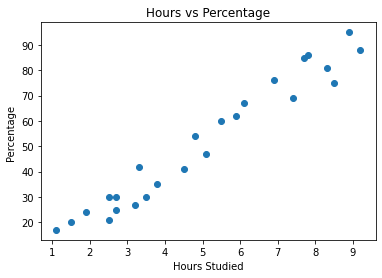

In [3]:
plt.scatter(x = student_data.Hours, y=student_data.Scores)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage ')  
plt.show()

 As you can see Linear Regression will be best fit for prediction

### **Data Preprocessing and Model Training**

In [4]:
x = student_data.iloc[:, 0].values  
y = student_data.iloc[:, 1].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
lr = LinearRegression()  
lr.fit(x_train.reshape(-1, 1), y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### **Line of regression**

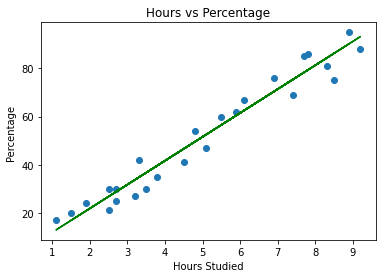

In [7]:
plt.scatter(x, y)
plt.plot(x, lr.coef_*x+lr.intercept_,color='Green');
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage ')  
plt.show()

### **Comparing Results**

In [8]:
y_pred = lr.predict(x_test.reshape(-1,1))

In [9]:
df = pd.DataFrame({'Test Values':x_test,'Actual Result': y_test, 'Predicted Result': y_pred}) 
df.head()

,Test Values,Actual Result,Predicted Result
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [10]:
print("Training Score:",lr.score(x_train.reshape(-1,1),y_train))
print("Test Score:",lr.score(x_test.reshape(-1,1),y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105354


### **Model Assessment**

In [11]:
print('Mean Absolute Error (MAE): {0:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred))) 
print('Mean Squared Error (MSE): {0:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error (RMSE): {0:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R2-score: {0:.2f}'.format(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error (MAE): 4.18
Mean Squared Error (MSE): 21.60
Root Mean Squared Error (RMSE): 4.65
R2-score: 0.95


### **Prediction of percentage of a student based on the number of hours studied**

In [12]:
a = float(input("Enter the number of hours studied: "))
y=lr.predict([[a]])
print('A student who studied {} hours will get {}%'.format(a,y[0]))

Enter the number of hours studied: 9.25
A student who studied 9.25 hours will get 93.69173248737539%
